In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import os
print(os.getcwd())

f:\deeplearning-study


In [2]:
os.chdir('./2-1/')

In [3]:
import gc_utils
import init_utils
import reg_utils
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
# # plt.rcParams['image.cmap'] = 'gray'

# initialize weights

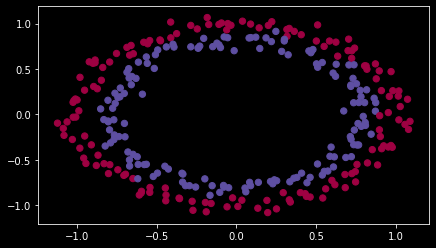

In [5]:
X_train, Y_train, X_test, Y_test = init_utils.load_dataset(is_plot=True)

In [11]:
def init_zeros(layers_dims):
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f'W{l}'] = np.zeros((layers_dims[l], layers_dims[l-1]))
        params[f'b{l}'] = np.zeros((layers_dims[l], 1))
    return params

def init_random(layers_dims):
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f'W{l}'] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        params[f'b{l}'] = np.zeros((layers_dims[l], 1))
    return params

def init_he(layers_dims):
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f'W{l}'] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        params[f'b{l}'] = np.zeros((layers_dims[l], 1))
    return params

In [12]:
def model(X, Y, alpha=0.005, loops=5000, init_method='he'):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    # inintial params
    if init_method == 'zeros':
        params = init_zeros(layers_dims)
    elif init_method == 'random':
        params = init_random(layers_dims)
    elif init_method == 'he':
        params = init_he(layers_dims)
    else:
        print('Error: unexcepted init_method!')
    # start train
    for i in range(loops):
        a3, cache = init_utils.forward_propagation(X, params)
        cost = init_utils.compute_loss(a3, Y)
        costs.append(cost)
        grads = init_utils.backward_propagation(X, Y, cache)
        params = init_utils.update_parameters(params, grads, alpha)
        if (i+1) % 100 == 0:
            print(f'No.{i+1} iteration\'s loss: {cost}')
    plt.plot(costs)
    plt.xlabel('step')
    plt.ylabel('loss')
    plt.title('loss circle')
    plt.show()
    return params

No.100 iteration's loss: 0.6931471805599453
No.200 iteration's loss: 0.6931471805599453
No.300 iteration's loss: 0.6931471805599453
No.400 iteration's loss: 0.6931471805599453
No.500 iteration's loss: 0.6931471805599453
No.600 iteration's loss: 0.6931471805599453
No.700 iteration's loss: 0.6931471805599453
No.800 iteration's loss: 0.6931471805599453
No.900 iteration's loss: 0.6931471805599453
No.1000 iteration's loss: 0.6931471805599453
No.1100 iteration's loss: 0.6931471805599453
No.1200 iteration's loss: 0.6931471805599453
No.1300 iteration's loss: 0.6931471805599453
No.1400 iteration's loss: 0.6931471805599453
No.1500 iteration's loss: 0.6931471805599453
No.1600 iteration's loss: 0.6931471805599453
No.1700 iteration's loss: 0.6931471805599453
No.1800 iteration's loss: 0.6931471805599453
No.1900 iteration's loss: 0.6931471805599453
No.2000 iteration's loss: 0.6931471805599453
No.2100 iteration's loss: 0.6931471805599453
No.2200 iteration's loss: 0.6931471805599453
No.2300 iteration's

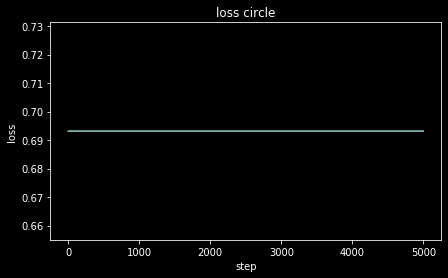

In [14]:
# use 'zero' to initial parameters
params = model(X_train, Y_train, init_method='zeros')
print('train set')
prediction = init_utils.predict(X_train, Y_train, params)
print('test set')
prediction = init_utils.predict(X_test, Y_test, params)

No.100 iteration's loss: inf
No.200 iteration's loss: inf
No.300 iteration's loss: inf
No.400 iteration's loss: inf
No.500 iteration's loss: inf
No.600 iteration's loss: inf
No.700 iteration's loss: inf
No.800 iteration's loss: inf
No.900 iteration's loss: inf
No.1000 iteration's loss: inf
No.1100 iteration's loss: inf
No.1200 iteration's loss: inf
No.1300 iteration's loss: inf
No.1400 iteration's loss: inf
No.1500 iteration's loss: inf
No.1600 iteration's loss: inf
No.1700 iteration's loss: inf
No.1800 iteration's loss: inf
No.1900 iteration's loss: inf
No.2000 iteration's loss: inf
No.2100 iteration's loss: inf
No.2200 iteration's loss: inf
No.2300 iteration's loss: inf
No.2400 iteration's loss: inf
No.2500 iteration's loss: inf
No.2600 iteration's loss: inf
No.2700 iteration's loss: inf
No.2800 iteration's loss: inf
No.2900 iteration's loss: inf
No.3000 iteration's loss: inf
No.3100 iteration's loss: inf
No.3200 iteration's loss: inf
No.3300 iteration's loss: inf
No.3400 iteration's

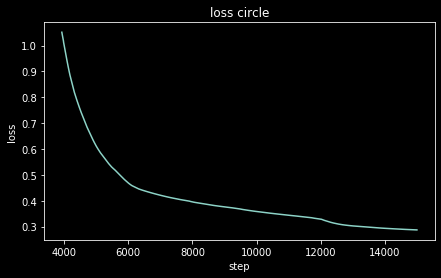

In [69]:
# use 'random' to initial parameters
np.random.seed(1)
params = model(X_train, Y_train, alpha=0.001, loops=15000, init_method='random')
print('train set')
prediction = init_utils.predict(X_train, Y_train, params)
print('test set')
prediction = init_utils.predict(X_test, Y_test, params)

No.100 iteration's loss: 0.688314869954039
No.200 iteration's loss: 0.6823212226178333
No.300 iteration's loss: 0.6764708607446656
No.400 iteration's loss: 0.6695060372788639
No.500 iteration's loss: 0.6601353700090945
No.600 iteration's loss: 0.6428209817501477
No.700 iteration's loss: 0.6178396390381038
No.800 iteration's loss: 0.584061858695974
No.900 iteration's loss: 0.5405915106358948
No.1000 iteration's loss: 0.4863021420524793
No.1100 iteration's loss: 0.42560311892779595
No.1200 iteration's loss: 0.3651941480909231
No.1300 iteration's loss: 0.3105988429935184
No.1400 iteration's loss: 0.264874465602396
No.1500 iteration's loss: 0.2283724661121673
No.1600 iteration's loss: 0.1997027874225399
No.1700 iteration's loss: 0.1766506768118275
No.1800 iteration's loss: 0.1587335459189352
No.1900 iteration's loss: 0.1450055538338432
No.2000 iteration's loss: 0.13432806753682064
No.2100 iteration's loss: 0.12582355760348155
No.2200 iteration's loss: 0.116545414818029
No.2300 iteration's 

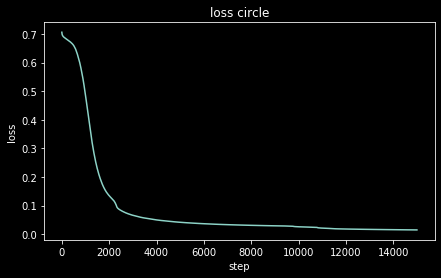

In [76]:
# use 'he' to initial parameters
np.random.seed(1)
params = model(X_train, Y_train, alpha=0.06, loops=15000, init_method='he')
print('train set')
prediction = init_utils.predict(X_train, Y_train, params)
print('test set')
prediction = init_utils.predict(X_test, Y_test, params)

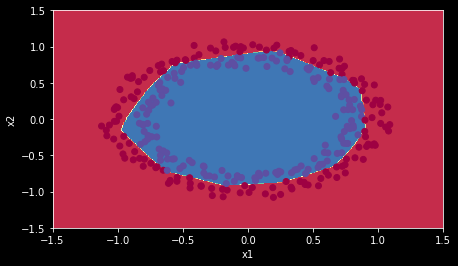

In [102]:
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda X: init_utils.predict_dec(params, X.T), X_train, np.squeeze(Y_train))

# no-regularization, L2-regularization, dropout

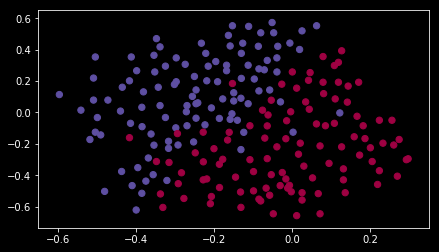

In [4]:
X_re_train, Y_re_train, X_re_test, Y_re_test = reg_utils.load_2D_dataset(is_plot=True)

In [44]:
def forward_propagate_with_reg(X, params, keep_prob=1):
    # retrieve parameters
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    D1 = np.random.rand(z1.shape[0], z1.shape[1]) < keep_prob
    # 每个样本dropout都不同, 所以不要用boardcast
    a1 = reg_utils.relu(z1) * D1 / keep_prob
    z2 = np.dot(W2, a1) + b2
    D2 = np.random.rand(z2.shape[0], z2.shape[1]) < keep_prob
    a2 = reg_utils.relu(z2) * D2 / keep_prob
    z3 = np.dot(W3, a2) + b3
    a3 = reg_utils.sigmoid(z3)
    cache = (D1, z1, a1, W1, b1, D2, z2, a2, W2, b2, z3, a3, W3, b3)
    return a3, cache

def compute_loss_with_reg(A3, Y, params, lambd=0):
    m = Y.shape[1]
    W1 = params['W1']
    W2 = params['W2']
    W3 = params['W3']
    cross_entropy_cost = reg_utils.compute_cost(A3, Y)
    L2_regularization_cost = lambd * (np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2)) / (2*m)
    loss = cross_entropy_cost + L2_regularization_cost
    return loss

def backward_propagate_with_reg(X, Y, cache, lambd=0, keep_prob=1):
    m = X.shape[1]
    (D1, z1, a1, W1, b1, D2, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T) + W3 * (lambd/m)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    da2 = np.dot(W3.T, dz3) * D2 / keep_prob
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T) + W2 * (lambd/m)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    da1 = np.dot(W2.T, dz2) * D1 / keep_prob
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T) + W1 * (lambd/m)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    return gradients

In [46]:
def model_reg(X, Y, alpha=0.05, loops=10000, lambd=0, keep_prob=1, init_method='he'):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 20, 3, 1]
    # inintial params
    if init_method == 'zeros':
        params = init_zeros(layers_dims)
    elif init_method == 'random':
        params = init_random(layers_dims)
    elif init_method == 'he':
        params = init_he(layers_dims)
    else:
        print('Error: unexcepted init_method!')
    # start train
    for i in range(loops):
        a3, cache = forward_propagate_with_reg(X, params, keep_prob=keep_prob)
        cost = compute_loss_with_reg(a3, Y, params, lambd=lambd)
        costs.append(cost)
        grads = backward_propagate_with_reg(X, Y, cache, lambd=lambd, keep_prob=keep_prob)
        params = reg_utils.update_parameters(params, grads, alpha)
        if (i+1) % 100 == 0:
            print(f'No.{i+1} iteration\'s loss: {cost}')
    plt.plot(costs)
    plt.xlabel('step')
    plt.ylabel('loss')
    plt.title('loss circle')
    plt.show()
    return params

No.100 iteration's loss: 0.4895566690715657
No.200 iteration's loss: 0.2779126586460358
No.300 iteration's loss: 0.2408719872201033
No.400 iteration's loss: 0.23354539338866329
No.500 iteration's loss: 0.23055984116039338
No.600 iteration's loss: 0.22896903867954554
No.700 iteration's loss: 0.22811276177886142
No.800 iteration's loss: 0.22737477490091995
No.900 iteration's loss: 0.22667616045134367
No.1000 iteration's loss: 0.22599959842216696
No.1100 iteration's loss: 0.22535708909992783
No.1200 iteration's loss: 0.22472603966940963
No.1300 iteration's loss: 0.2240849812006632
No.1400 iteration's loss: 0.22344662106383323
No.1500 iteration's loss: 0.22281745188350813
No.1600 iteration's loss: 0.22219074423379456
No.1700 iteration's loss: 0.22155643376905798
No.1800 iteration's loss: 0.2209127033355817
No.1900 iteration's loss: 0.22024072579677087
No.2000 iteration's loss: 0.21954283085861515
No.2100 iteration's loss: 0.2188420183459235
No.2200 iteration's loss: 0.2181383148649366
No.2

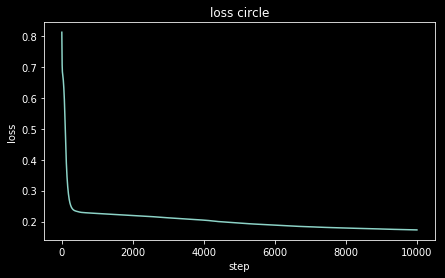

In [28]:
# no regularization
np.random.seed(1)
params = model_reg(X_re_train, Y_re_train, alpha=0.08, loops=10000, lambd=0, keep_prob=1, init_method='he')
print('train set')
prediction = reg_utils.predict(X_re_train, Y_re_train, params)
print('test set')
prediction = reg_utils.predict(X_re_test, Y_re_test, params)

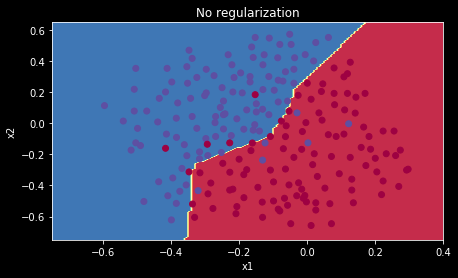

In [30]:
plt.title('No regularization')
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
reg_utils.plot_decision_boundary(lambda X: reg_utils.predict_dec(params, X.T), X_re_train, np.squeeze(Y_re_train))

No.100 iteration's loss: 0.5724497660497898
No.200 iteration's loss: 0.36214035837830244
No.300 iteration's loss: 0.324071082782029
No.400 iteration's loss: 0.31512158358582837
No.500 iteration's loss: 0.311172132287086
No.600 iteration's loss: 0.3082926046417404
No.700 iteration's loss: 0.3057872598978404
No.800 iteration's loss: 0.30350632994909277
No.900 iteration's loss: 0.30139612240959
No.1000 iteration's loss: 0.29942415930737576
No.1100 iteration's loss: 0.29747719731937244
No.1200 iteration's loss: 0.29558336852120065
No.1300 iteration's loss: 0.2935224954364004
No.1400 iteration's loss: 0.2919688388598667
No.1500 iteration's loss: 0.2905402325019236
No.1600 iteration's loss: 0.2892149717525602
No.1700 iteration's loss: 0.2879780981368453
No.1800 iteration's loss: 0.28682260164327467
No.1900 iteration's loss: 0.28573872542770384
No.2000 iteration's loss: 0.28472258685605667
No.2100 iteration's loss: 0.2837702480912611
No.2200 iteration's loss: 0.28286904877660085
No.2300 itera

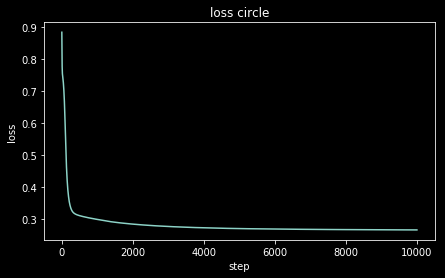

In [31]:
# L2 regularization
np.random.seed(1)
params = model_reg(X_re_train, Y_re_train, alpha=0.08, loops=10000, lambd=0.7, keep_prob=1, init_method='he')
print('train set')
prediction = reg_utils.predict(X_re_train, Y_re_train, params)
print('test set')
prediction = reg_utils.predict(X_re_test, Y_re_test, params)

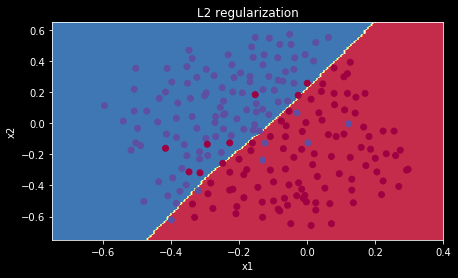

In [32]:
plt.title('L2 regularization')
# 抑制过拟合 , 分界面更平滑
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
reg_utils.plot_decision_boundary(lambda X: reg_utils.predict_dec(params, X.T), X_re_train, np.squeeze(Y_re_train))

No.100 iteration's loss: 0.49293019678344013
No.200 iteration's loss: 0.35876385664988664
No.300 iteration's loss: 0.2994033489042543
No.400 iteration's loss: 0.29178498015645693
No.500 iteration's loss: 0.2769020371912728
No.600 iteration's loss: 0.2934418241349939
No.700 iteration's loss: 0.2651879724931963
No.800 iteration's loss: 0.2533177865971306
No.900 iteration's loss: 0.2787073750194758
No.1000 iteration's loss: 0.2803255371834975
No.1100 iteration's loss: 0.2771053691401018
No.1200 iteration's loss: 0.25437170875200305
No.1300 iteration's loss: 0.25688353441399797
No.1400 iteration's loss: 0.24841397355473957
No.1500 iteration's loss: 0.2692912321682485
No.1600 iteration's loss: 0.27585293763549207
No.1700 iteration's loss: 0.27880783262992404
No.1800 iteration's loss: 0.2512250146725163
No.1900 iteration's loss: 0.2618640021528917
No.2000 iteration's loss: 0.23086260010126597
No.2100 iteration's loss: 0.2372038097251451
No.2200 iteration's loss: 0.24771891681638633
No.2300 i

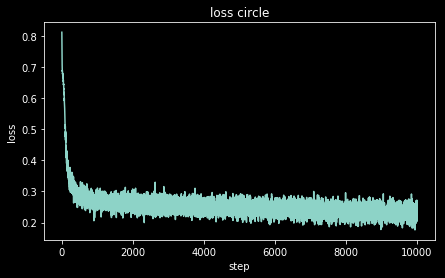

In [78]:
# dropout
np.random.seed(1)
params = model_reg(X_re_train, Y_re_train, alpha=0.08, loops=10000, lambd=0, keep_prob=0.9, init_method='he')
print('train set')
prediction = reg_utils.predict(X_re_train, Y_re_train, params)
print('test set')
prediction = reg_utils.predict(X_re_test, Y_re_test, params)

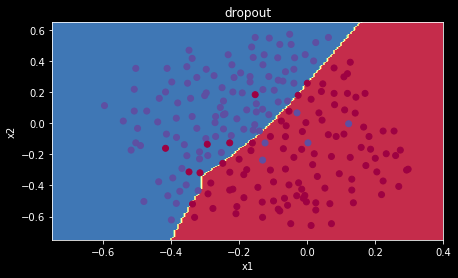

In [79]:
plt.title('dropout')
# 效果似乎不如L2正则, 平缓阶段会有震荡且很难通过alpha调整, 不过结果同样具备更好的泛化能力
# 如果每隔500或者1000取点作图, 你可能不会看到这么明显的震荡
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
reg_utils.plot_decision_boundary(lambda X: reg_utils.predict_dec(params, X.T), X_re_train, np.squeeze(Y_re_train))

# gradients check

In [91]:
def gradients_check(X, Y, lambd=0, keep_prob=1, init_method='he'):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 20, 3, 1]
    # inintial params
    if init_method == 'zeros':
        params = init_zeros(layers_dims)
    elif init_method == 'random':
        params = init_random(layers_dims)
    elif init_method == 'he':
        params = init_he(layers_dims)
    else:
        print('Error: unexcepted init_method!')
    
    # compute grads on W1[0][0]
    a3, cache = forward_propagate_with_reg(X, params, keep_prob=keep_prob)
    grads = backward_propagate_with_reg(X, Y, cache, lambd=lambd, keep_prob=keep_prob)
    grads_vector = gc_utils.gradients_to_vector(grads)

    theta, keys = gc_utils.dictionary_to_vector(params)#转化成向量方便索引(n, 1)
    n = theta.shape[0]#参数个数
    grads_approx_vector = np.zeros((n, 1))
    
    # compute grads_approx
    for i in range(n):
        theta_p = np.copy(theta)
        theta_p[i, 0] += 1e-7
        params_p = gc_utils.vector_to_dictionary(theta_p)
        theta_m = np.copy(theta)
        theta_m[i, 0] -= 1e-7
        params_m = gc_utils.vector_to_dictionary(theta_m)
        a3_, cache_ = forward_propagate_with_reg(X, params_p, keep_prob=keep_prob)
        J_p = compute_loss_with_reg(a3_, Y, params_p, lambd=lambd)
        a3_, cache_ = forward_propagate_with_reg(X, params_m, keep_prob=keep_prob)
        J_m = compute_loss_with_reg(a3_, Y, params_m, lambd=lambd)
        d_approx = (J_p - J_m) / (2 * 1e-7)
        grads_approx_vector[i, 1] = d_approx

    # compute difference
    numerator = np.linalg.norm(grads_vector - grads_approx_vector)
    denominator = np.linalg.norm(grads_vector) + np.linalg.norm(grads_approx_vector)
    diff = numerator / denominator
    return diff

In [95]:
X_case = np.array([
    [1,3,5,7,9],
    [2,4,6,8,10],
    [3,6,9,12,15],
    [4,8,12,16,20]
])
Y_case = np.array([[1,1,0,0,1]])
diff = gradients_check(X_case, Y_case, lambd=0, keep_prob=1, init_method='he')
print(f'diff = {diff}', '梯度是否在阈值内(正常?):', diff<1e-7)

diff = 2.6317795172302175e-10 梯度是否在阈值内(正常?): True
